**Predicting Artist Gender Using Artwork Size: Exploring Gender Discrimination in the Artistic Profession**

DSCI 100 004 Project Report

Group 28

**Anneke Dresselhuis** - 60524006 | **Hesham El Kassem** - 37765682 | **Ariane Huang** - 94730660 | **Elaine Zhou** - 99976417

**Introduction** 

Historical and contemporary artists have made and continue to make artwork using a variety of media including painting, drawing, sculpture, photography, printmaking among others. Throughout history, however, socio-economic inequalties have made it difficult for women-identifying artists to work with certain types of media - particularly those which require a significant amount of space (Bain, 2006) which can be costly. Given that women's artwork has historically taken smaller forms and has been categorized as less significant "arts and crafts" rather than grand masterpieces or "valuable art" made by men (Thomas, 2020), women artists have experienced and continue to experience disproportionate financial hardships in their creative practices. A recent art exhibition at Vancouver's Contemporary Art Gallery titled, "The Artist's Studio is Her Bedroom" alludes to the reality of spatial and financial constraints faced by many women artists today (Contemporary Art Gallery, 2020). 

Our analysis uses data from New York's Museum of Modern Art (MoMA) and will seek to answer the following question: **given the size of an artwork, what will be the gender of the artist?** This expansive dataset contains metadata on each artwork in MoMA's permanant collection; in this analysis we will be using the variables: "Gender" (denoting whether the artist is male or female), "Height" (measuring the artwork height in centimeters) and "Width" (measuring the artwork width in centimeters).

We note that gender in this dataset is constrained to a binary class, although in real life gender is best understood as a existing on a spectrum. Currently, little emperical attention has been given to documenting discrimination in the artistic profession. The results from this analysis could be used to inform public funding iniatives that support women artists' access to studio space, improve their ability to create larger works and ultimately strengthen their financial security. 

**Sources:**

Bain, A. L. (2004). Female artistic identity in place: The studio. Social & Cultural Geography, 5(2), 171–193. https://doi.org/10.1080/14649360410001690204

The Artist’s Studio is Her Bedroom. (2020). Contemporary Art Gallery, Vancouver. Retrieved November 8, 2021, from https://www.contemporaryartgallery.ca/exhibitions/the-artists-studio-is-her-bedroom/

Thomas, Z. (2020). Introduction: The Arts and Crafts movement, work cultures, and the politics of gender. In Women art workers and the Arts and Crafts movement (1st ed., pp. 1–32). Manchester University Press. https://www.jstor.org/stable/j.ctv11g95mh.5

**Preliminary Exploratory Data Anlaysis** 

First of all we loaded the libraries we need for the project.

In [1]:
library(tidyverse)
library(lubridate)
library(repr)
library(tidymodels)
library(GGally)
set.seed(1234)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9   

We read the data from https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv" using `read_csv` function as the columns of the dataset is seperated by commas. 


In [2]:
#load dataset
artworks <- read_csv("https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv")

#explore a subset of the data: last 1000 entries
artworks_6 <- tail(artworks, 6)
artworks_6

Parsed with column specification:
cols(
  .default = col_character(),
  DateAcquired = col_date(format = ""),
  ObjectID = col_double(),
  `Circumference (cm)` = col_logical(),
  `Depth (cm)` = col_double(),
  `Diameter (cm)` = col_double(),
  `Height (cm)` = col_double(),
  `Length (cm)` = col_logical(),
  `Weight (kg)` = col_double(),
  `Width (cm)` = col_double(),
  `Seat Height (cm)` = col_logical(),
  `Duration (sec.)` = col_logical()
)

See spec(...) for full column specifications.

Warning message:
“2892 parsing failures.
 row         col           expected actual                                                                                         file
1002 Length (cm) 1/0/T/F/TRUE/FALSE  17.8  'https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv'
1003 Length (cm) 1/0/T/F/TRUE/FALSE  19.0  'https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv'
1004 Length (cm) 1/0/T/F/TRUE/FALSE  18.1  'https://media

Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,⋯,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>
"Silver Springs, FL",Unknown photographer,8595,NA,(),(0),(0),(),February 1903,Gelatin silver print,⋯,http://www.moma.org/media/W1siZiIsIjQ5MjcyMCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=8198120224d3f8dd,NA,NA,NA,8.80000,NA,NA,30.00000,NA,NA
Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lewis Chesnutt","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(0) (1861) (1860),(0) (1934) (1933),() (Male) (Male),c. 1890,Gelatin silver print,⋯,http://www.moma.org/media/W1siZiIsIjQ5MjcyMiJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=868071c597640056,NA,NA,NA,10.79502,NA,NA,16.51003,NA,NA
Plate (folio 2 verso) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTExNSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=0850c50841bddd28,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA
Plate (folio 6) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTExOCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=70e2d5d8543da2a6,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA
Plate (folio 12) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTEyMCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=72d94323cdc79256,NA,NA,NA,11.00000,NA,NA,10.00000,NA,NA
Plate (folio 16) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTEyMSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=6fed2330b797a1b8,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA


In [3]:
#tidy column names
colnames(artworks) <- make.names(colnames(artworks), unique = TRUE)
artworks_6 <- tail(artworks, 6)
artworks_6

Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,⋯,ThumbnailURL,Circumference..cm.,Depth..cm.,Diameter..cm.,Height..cm.,Length..cm.,Weight..kg.,Width..cm.,Seat.Height..cm.,Duration..sec..
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>
"Silver Springs, FL",Unknown photographer,8595,NA,(),(0),(0),(),February 1903,Gelatin silver print,⋯,http://www.moma.org/media/W1siZiIsIjQ5MjcyMCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=8198120224d3f8dd,NA,NA,NA,8.80000,NA,NA,30.00000,NA,NA
Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lewis Chesnutt","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(0) (1861) (1860),(0) (1934) (1933),() (Male) (Male),c. 1890,Gelatin silver print,⋯,http://www.moma.org/media/W1siZiIsIjQ5MjcyMiJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=868071c597640056,NA,NA,NA,10.79502,NA,NA,16.51003,NA,NA
Plate (folio 2 verso) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTExNSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=0850c50841bddd28,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA
Plate (folio 6) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTExOCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=70e2d5d8543da2a6,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA
Plate (folio 12) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTEyMCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=72d94323cdc79256,NA,NA,NA,11.00000,NA,NA,10.00000,NA,NA
Plate (folio 16) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTEyMSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=6fed2330b797a1b8,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA


However, some column names of the dataset has to be revised. For example, the column Height (cm) will be considered as a function Height with argument cm in R. By renaming the column names using make.names function we are able to use them directly.

We first have to split our data into a training set and a testing set. We will only use the training set to plot graph. Width and Height are the two predictors we want to use to predict the artists' gender. By doing `filter(Gender == "(Male)")` and `filter(Gender == "(Female)")` we successfully separated our data into two subsets by genders. Since the data is untidy and there are 409 levels of Genders, the best option was to filter out (Male) and (Female) since extracting all the genders would be extremely computationally expensive especially for our time frame.

In [4]:
#split data into training (75% of data so that there is a reasonable amount of data for the modelto effectively learn) and testing (25% of data so there is a reasonable amount to evaluate on) set, making sure to set seed first so that work is reproducible
artworks_selected <- artworks %>%
                     select(Height..cm., Width..cm., Gender)
artworks_filter <- artworks_selected %>%
                    filter(Gender == "(Male)" | Gender == "(Female)") %>%
                    filter(Height..cm. != "NA") %>%
                        filter(Width..cm. != "NA") %>%
                        filter(Width..cm. != 0) %>%
                        filter(Height..cm. != 0)
tail(artworks_filter,6)
#filter out (Male) and (Female) from Genders column
artworks_male <- artworks_filter %>%
                 filter(Gender == "(Male)")
                
artworks_male <- sample_n(artworks_male, 1200)
artworks_male_6 <- tail(artworks_male, 6)
artworks_male_6
nrow(artworks_male)

Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
10.5,8,(Male)
10.5,8,(Male)
13.5,10,(Female)
13.5,10,(Female)
11.0,10,(Female)
13.5,10,(Female)


Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
34.20000,22.20000,(Male)
24.76505,17.78004,(Male)
3.10000,3.10000,(Male)
35.56010,21.43130,(Male)
23.80000,17.70000,(Male)
29.50000,45.60000,(Male)


[1] 1200

In [5]:
artworks_female <- artworks_filter %>%
                        filter(Gender == "(Female)")                        
artworks_female <- sample_n(artworks_female, size = 1200)
artworks_female_6 <- tail(artworks_female, 6)
artworks_female_6 
nrow(artworks_female)

Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
35.00000,24.50000,(Female)
42.50000,27.50000,(Female)
15.24003,22.86005,(Female)
30.48006,45.72009,(Female)
79.37516,65.40513,(Female)
25.20000,30.20000,(Female)


[1] 1200

In [6]:
artworks_both <- rbind(artworks_male, artworks_female)
artworks_both <- sample_n(artworks_both, 1200) %>%
                 filter(Height..cm. != "NA") %>%
                 filter(Width..cm. != "NA") %>%
                 filter(Width..cm. != 0) %>%
                 filter(Height..cm. != 0)
artworks_both_6 <- tail(artworks_both, 6)
artworks_both_6
nrow(artworks_both)

Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
23.90000,18.60000,(Male)
40.32258,29.84506,(Female)
22.90000,34.00000,(Male)
19.10000,24.10000,(Female)
58.80000,45.60000,(Male)
1.50000,5.80000,(Female)


[1] 1200

In order to prove gender can affect sizes of artworks, we have to show differences in artworks' height and width produced by artists in different gender. We generated coloured plots using ggpairs so that it is easy to contrast and compare the differing data from the two genders.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



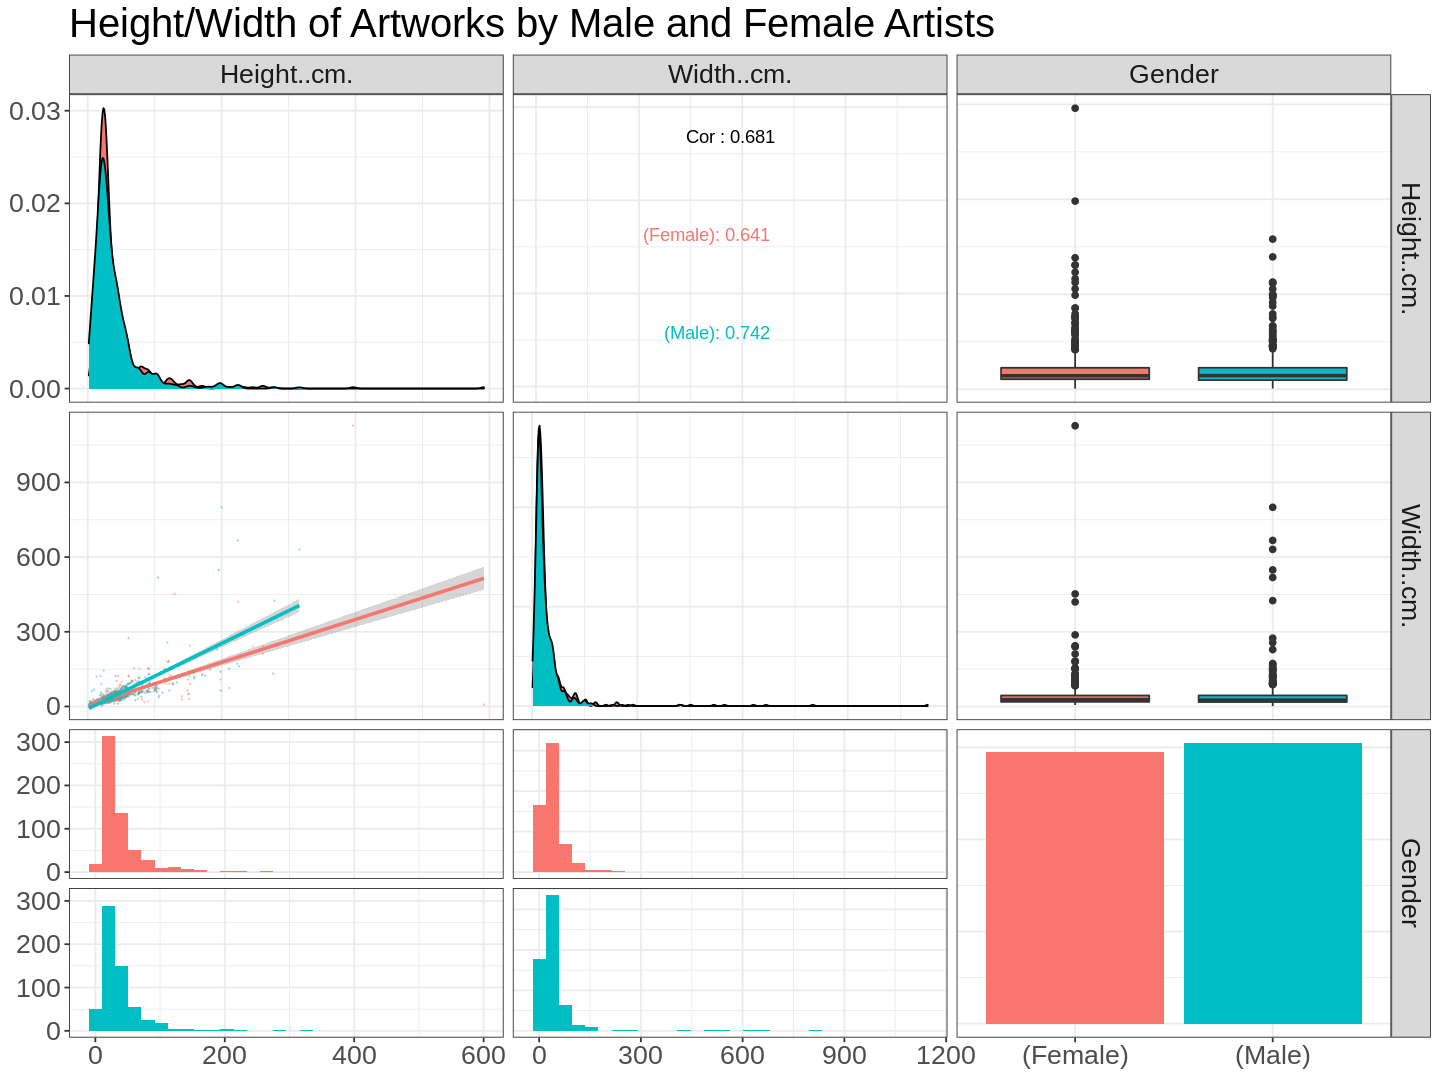

In [7]:
options(repr.plot.height = 9, repr.plot.width = 12)
gender_plot <- artworks_both %>%
                   ggpairs(title = "Height/Width of Artworks by Male and Female Artists", 
                   mapping = ggplot2::aes(colour=Gender), 
                   lower = list(continuous = wrap("smooth", alpha = 0.3, size=0.1)))  +
                   labs("Height(cm)", "Width(cm)", "Gender(Female and Male)") +
                   theme_bw() +
                   theme(text = element_text(size = 20))
gender_plot

This plot allows us to see if there are any outliers that may affect accuracy, and here we can see that there are 2 outliers for female which we will remove to improve the accuracy.

In [8]:
#remove outliers with slice 
artworks_width_revised <- arrange(artworks_both, Width..cm.) %>%
                          slice(1:(n()-1))
artworks_width_revised_6 <- tail(artworks_width_revised, 6)
artworks_width_revised_6
artworks_height_revised <- arrange(artworks_width_revised, Height..cm.) %>%
                           slice(1:(n()-1))
artworks_height_revised_6 <- tail(artworks_height_revised, 6)
artworks_height_revised_6

Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
129.5403,452.1209,(Female)
105.1000,518.2000,(Male)
195.6000,548.6000,(Male)
316.2306,631.1913,(Male)
224.1554,667.0688,(Male)
200.0254,800.1016,(Male)


Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
246.3805,240.0305,(Female)
261.5000,241.2000,(Female)
261.6205,210.8204,(Female)
276.9000,132.1000,(Female)
278.8000,425.2000,(Male)
316.2306,631.1913,(Male)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



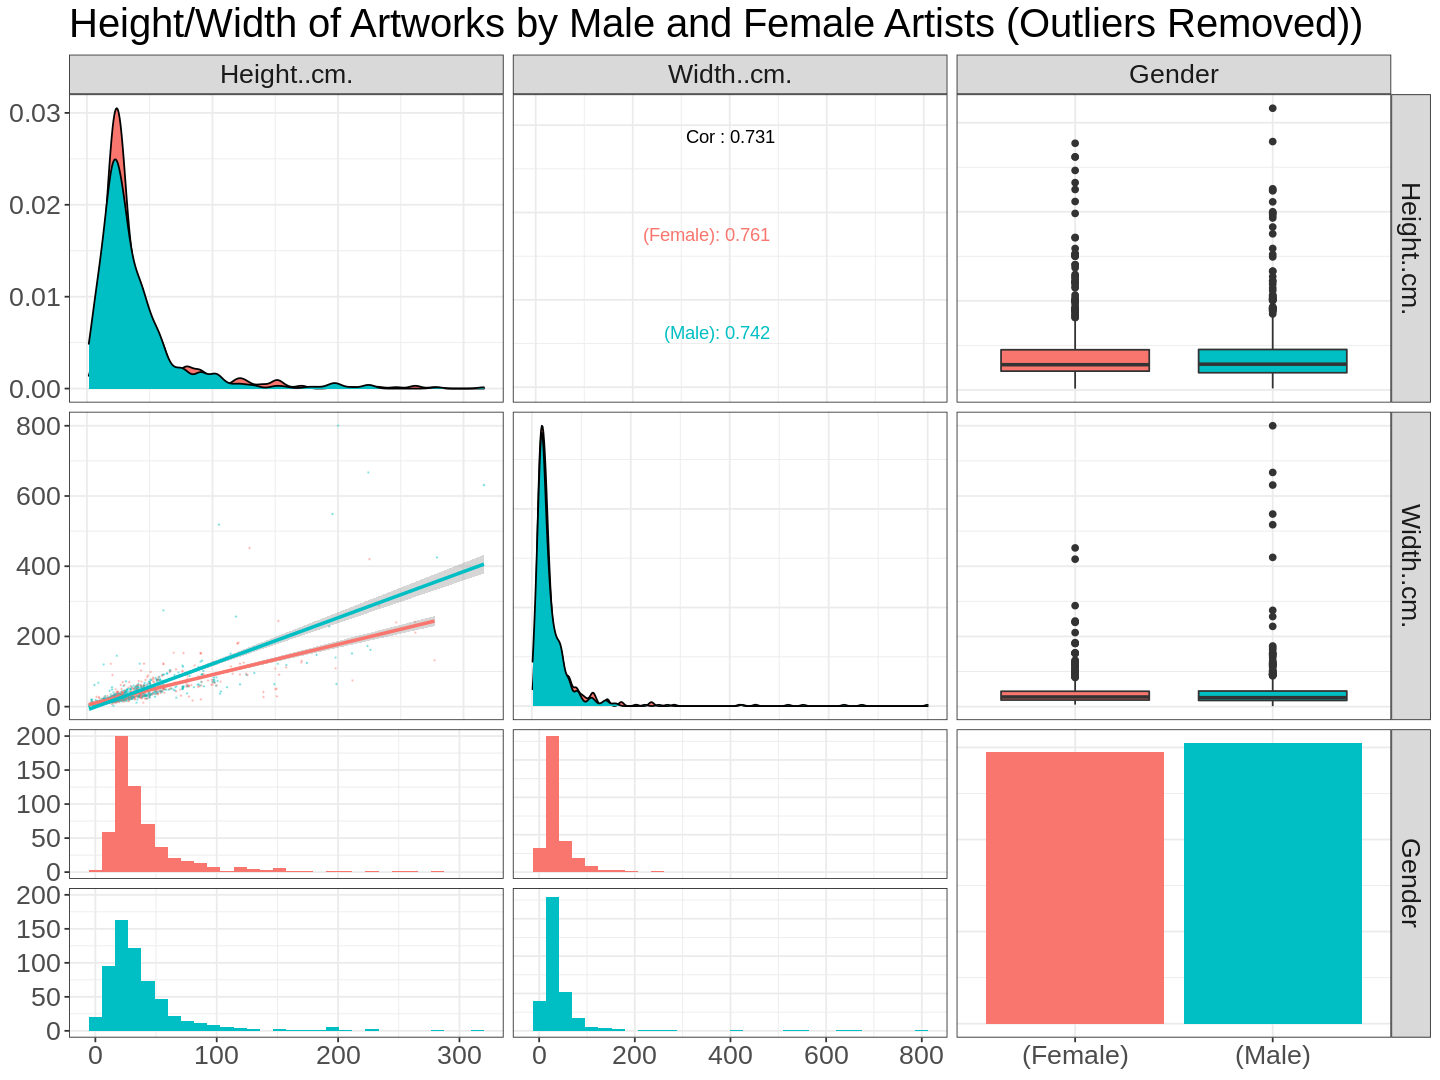

In [9]:
#make plot with revised width data
options(repr.plot.height = 9, repr.plot.width = 12)
gender_plot_revised <- artworks_height_revised %>%
                   ggpairs(title = "Height/Width of Artworks by Male and Female Artists (Outliers Removed))", 
                   mapping = ggplot2::aes(colour=Gender), 
                   lower = list(continuous = wrap("smooth", alpha = 0.3, size=0.1)))  +
                   labs("Height(cm)", "Width(cm)", "Gender(Female and Male)") +
                   theme_bw() +
                   theme(text = element_text(size = 20))
gender_plot_revised

After removing outliers, the average width of artworks created by male artists are higher than that of female artists.
For the height of artworks, when the height of artpieces is small, artists in both genders have relatively similar proportion. However, for artworks with large height, their artists are tend to be female. We then proceed with knn classification (not regression because our expected result is qualitative)

In [10]:
artworks_both <- artworks_both %>%
                 mutate(Gender = as_factor(Gender))
artworks_split <- initial_split(artworks_both, prop = 0.75, strat = Gender)
artworks_training <- training(artworks_split)
artworks_testing <- testing(artworks_split)
#scaling and setting the recipe
set.seed(1234)
artwork_recipe <- recipe(Gender ~ Height..cm. + Width..cm., data = artworks_both) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())
artwork_recipe 

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [11]:
#creating k-nearest neighbor classifier with k=3. 
artwork_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
  set_engine("kknn") %>%
  set_mode("classification")
artwork_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


In [12]:
#creating cross validation using vfold
artwork_vfold <- vfold_cv(artworks_both, v = 10, strata = Gender)


#perform workflow analysis, using fit resamples
artworks_resample_fit <- workflow() %>%
  add_recipe(artwork_recipe) %>%
  add_model(artwork_spec) %>%
  fit_resamples(resamples = artwork_vfold)

#assessing accuracy of the model
artworks_metrics <- collect_metrics(artworks_resample_fit)
artworks_metrics

.metric,.estimator,mean,n,std_err
<chr>,<chr>,<dbl>,<int>,<dbl>
accuracy,binary,0.5499869,10,0.01195651
roc_auc,binary,0.5667961,10,0.01269315


In [13]:
#new model specification using tune() argument
set.seed(1234)
artworks_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")
artworks_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [14]:
#getting the results from the new model
artworks_tune_results <- workflow() %>%
  add_recipe(artwork_recipe) %>%
  add_model(artworks_tune) %>%
  tune_grid(resamples = artwork_vfold, grid = 10) %>%
  collect_metrics()
artworks_tune_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.5516398,10,0.008719095,Model01
2,roc_auc,binary,0.5609591,10,0.010018644,Model01
3,accuracy,binary,0.5499869,10,0.011956511,Model02
3,roc_auc,binary,0.5667961,10,0.012693145,Model02
4,accuracy,binary,0.5491535,10,0.011985415,Model03
4,roc_auc,binary,0.5728001,10,0.012725530,Model03
5,accuracy,binary,0.5591332,10,0.013385007,Model04
5,roc_auc,binary,0.5647969,10,0.012535764,Model04
7,accuracy,binary,0.5441190,10,0.009756729,Model05


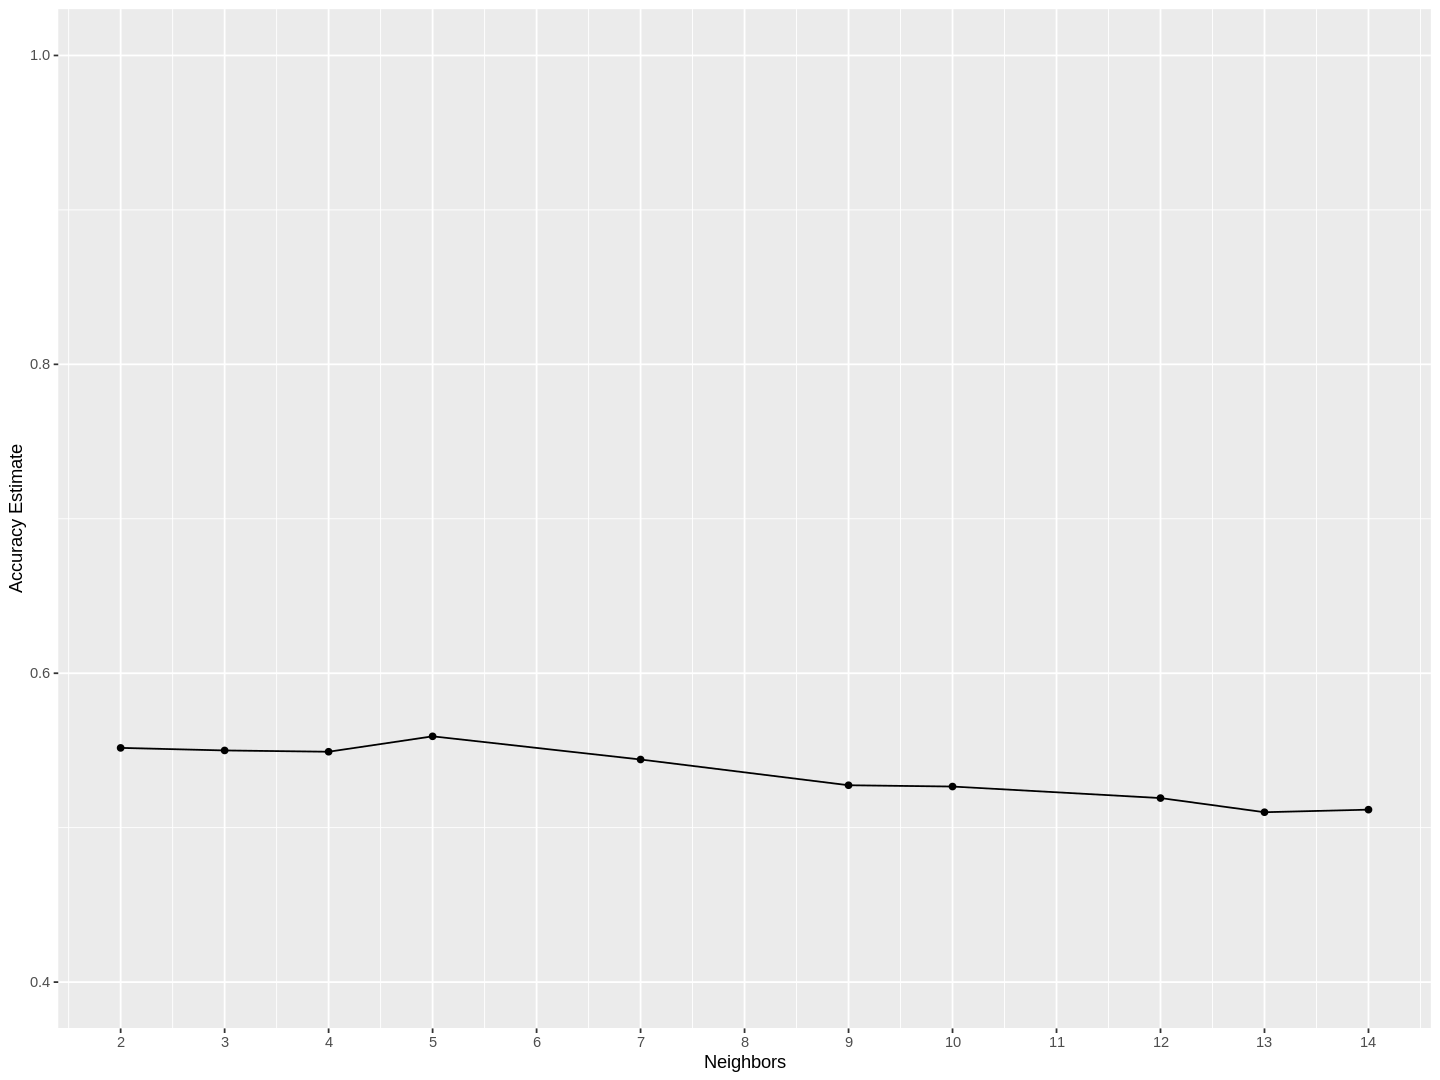

In [15]:
#finding the best result:
accuracies <- artworks_tune_results %>% 
      filter(.metric == 'accuracy')

#plotting the different accuracies of K
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_versus_k

#Next step would be do use this model to make predictions - but seems like it would just guess 55%

Our classifier accuracy is pretty low unfortunately staying at approximately 0.55 or 55%, due to no significant difference between the Height and Width for artwork by males and females. Our hypothesis is therefore rejected from this result in terms of this particular dataset.

In [17]:
artworks_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
                      set_engine("kknn") %>%
                      set_mode("classification")
# artworks_best_spec
artworks_best_fit <- workflow() %>%
                     add_recipe(artwork_recipe) %>%
                     add_model(artworks_best_spec) %>%
                     fit(artworks_training)
# artworks_best_fit
artworks_predictions <- predict(artworks_best_fit, artworks_testing) %>%
                        bind_cols(artworks_testing)
tail(artworks_predictions,6)
artworks_new_metrics <- artworks_predictions %>%
                        metrics(truth = Gender, estimate = .pred_class)   
artworks_new_metrics
artworks_conf_mat <- artworks_predictions %>%
                     conf_mat(truth = Gender, estimate = .pred_class)
artworks_conf_mat

.pred_class,Height..cm.,Width..cm.,Gender
<fct>,<dbl>,<dbl>,<fct>
(Female),25.0000,19.50,(Male)
(Male),49.7000,27.50,(Female)
(Male),38.6000,53.80,(Female)
(Female),21.3000,12.50,(Female)
(Female),46.3551,22.86,(Female)
(Female),23.9000,18.60,(Male)


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.53511706
kap,binary,0.06986997


          Truth
Prediction (Female) (Male)
  (Female)       77     69
  (Male)         70     83

**Methods** 

We used a "K" nearest neighbours analysis to classify the gender of the artists in this data set using the predictors Height and Width. In order to find the optimized value for “K”, we will conduct a cross validation using `vfold_cv()`.

We split the data and created a recipe where we specify Gender as our target and Height and Width as our predictors using the training data set. Then compute the "K" nearest straight-line distances using the `"rectangular"` weight function, set the neighbours to `tune()`, set the engine as `"kknn"` using `"classification"` mode. 

Next we will train the classifier using the `workflow()`, input the result of our cross validation into the `fit_resamples` function, `collect_metrics()` to evaluate how well it performed, then use `predict()` function to apply our classifier to the testing data.`bind_cols()` allows us to view the predictions in our testing data. 

**Expected Outcomes and Significance** 

We anticipate that our analysis will empirically verify what has colloquiually been identified as a differential between artwork sizes by male and female artists. According to our current understanding and logic, observations with larger values for height and width will most likely be predicted as Male and observations with smaller values for height and width will most likely be predicted as Female.